In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
#load files for analysis
reviews = pd.read_csv("reviews.csv")
reviews.head()

,Unnamed: 0,brewery_id,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_abv,beer_beerid
0,0,10325,1.5,2.0,2.5,26341.0,66,1.5,1.5,5.0,47986
1,1,10325,3.0,2.5,3.0,26341.0,52,3.0,3.0,6.2,48213
2,2,10325,3.0,2.5,3.0,26341.0,60,3.0,3.0,6.5,48215
3,3,10325,3.0,3.0,3.5,26341.0,62,2.5,3.0,5.0,47969
4,4,1075,4.0,4.5,4.0,19845.0,10,4.0,4.5,7.7,64883


In [3]:
types = pd.read_csv("beer_types.csv")
types.head()

,beer_beerid,beer_style,styles,beer_name
0,3,13,American IPA,Cactus Queen IPA
1,88,13,American IPA,Stone IPA (India Pale Ale)
2,120,13,American IPA,Pick Axe IPA
3,205,13,American IPA,Snake Dog IPA
4,311,13,American IPA,Harpoon IPA


In [13]:
reviews = reviews.dropna()

In [14]:
len(reviews)

1005528

In [4]:
types['styles'].unique()

array(['American IPA', 'American Stout', 'Vienna Lager',
       'English Brown Ale', 'Fruit / Vegetable Beer',
       'American Adjunct Lager', 'American Pale Lager', 'Scottish Ale',
       'Russian Imperial Stout', 'English India Pale Ale (IPA)',
       'American Pale Ale (APA)', 'American Pale Wheat Ale', 'Kölsch',
       'Extra Special / Strong Bitter (ESB)', 'German Pilsener',
       'Belgian Strong Dark Ale', 'Witbier', 'Tripel', 'Light Lager',
       'Scotch Ale / Wee Heavy', 'Altbier', 'Hefeweizen',
       'Märzen / Oktoberfest', 'American Porter', 'American Strong Ale',
       'Schwarzbier', 'Doppelbock', 'Pumpkin Ale', 'Bock', 'Cream Ale',
       'Belgian Strong Pale Ale', 'American Brown Ale',
       'Maibock / Helles Bock', 'Belgian Pale Ale', 'Belgian Dark Ale',
       'Dortmunder / Export Lager', 'Munich Dunkel Lager', 'Dunkelweizen',
       'Saison / Farmhouse Ale', 'Dubbel', 'Belgian IPA',
       'English Pale Ale', 'American Blonde Ale', 'Euro Pale Lager',
       'Engli

In [23]:
# Function to get the genre ratings
def get_style_ratings(reviews, types, styles, column_names):
    beer_ratings = pd.DataFrame()
    for style in styles:        
        beer_styles = types[types['styles'].str.contains(style) ]
        avg_style_votes_per_user = reviews[reviews['beer_beerid'].isin(types['beer_beerid'])].loc[:, ['review_profilename', 'review_overall']].groupby(['review_profilename'])['review_overall'].mean().round(2)
        
        beer_ratings = pd.concat([beer_styles, avg_style_votes_per_user], axis=1)
        
    beer_ratings.columns = column_names
    return beer_ratings


In [25]:
new = pd.merge(types, reviews, on = 'beer_beerid')
new.head()

,beer_beerid,beer_style_x,styles,beer_name,Unnamed: 0,brewery_id,review_overall,review_aroma,review_appearance,review_profilename,beer_style_y,review_palate,review_taste,beer_abv
0,88,13,American IPA,Stone IPA (India Pale Ale),858400,147,4.5,4.5,4.5,2873.0,13,4.0,4.5,6.9
1,88,13,American IPA,Stone IPA (India Pale Ale),858640,147,4.5,4.5,4.5,27415.0,13,4.0,4.5,6.9
2,88,13,American IPA,Stone IPA (India Pale Ale),858915,147,4.0,3.5,3.5,20414.0,13,4.0,4.0,6.9
3,88,13,American IPA,Stone IPA (India Pale Ale),868197,147,4.5,4.0,4.0,21186.0,13,4.0,4.5,6.9
4,88,13,American IPA,Stone IPA (India Pale Ale),868235,147,4.0,4.5,4.5,5495.0,13,4.0,4.0,6.9


In [57]:
grouped = new.groupby(['review_profilename','beer_name']).mean().round(2)['review_overall']
grouped.head(20)

review_profilename  beer_name                              
1.0                 10 Commandments                            3.5
                    15th Anniversary Wood Aged                 3.5
                    Adam                                       4.0
                    AleSmith Decadence 2007 Imperial Porter    3.0
                    AleSmith IPA                               5.0
                    AleSmith My Bloody Valentine               5.0
                    AleSmith Old Numbskull                     4.0
                    AleSmith Speedway Stout                    4.5
                    AleSmith Speedway Stout - Barrel Aged      3.5
                    Bell's Expedition Stout                    4.0
                    Bell's Hopslam Ale                         4.5
                    Biere De Garde                             4.0
                    Black Orchard                              4.5
                    Blonde                                     4.5
  

In [58]:
grouped = pd.DataFrame(grouped)
grouped = grouped.reset_index()
grouped

,review_profilename,beer_name,review_overall
0,1.0,10 Commandments,3.5
1,1.0,15th Anniversary Wood Aged,3.5
2,1.0,Adam,4.0
3,1.0,AleSmith Decadence 2007 Imperial Porter,3.0
4,1.0,AleSmith IPA,5.0
5,1.0,AleSmith My Bloody Valentine,5.0
6,1.0,AleSmith Old Numbskull,4.0
7,1.0,AleSmith Speedway Stout,4.5
8,1.0,AleSmith Speedway Stout - Barrel Aged,3.5
9,1.0,Bell's Expedition Stout,4.0


In [62]:
user_reviews = grouped.pivot(index='review_profilename',columns='beer_name',values='review_overall')
user_reviews = user_reviews.reset_index()
user_reviews

beer_name,review_profilename,! (Old Ale),"""100"" Pale Ale","""12"" Belgian Golden Strong Ale","""33"" Export","""76"" Anniversary Ale","""76"" Anniversary Ale With English Hops","""Cellar Reserve"" Triple Gold","""Check-Mate"" Cask Pilsner","""Fade To Black"" Porter",...,à L'Agave Et Au Citron Vert,überPils,Černá Hora Modrá Luna,Łomża Niepasteryzowana,Świąteczne,Švyturys Nefiltruotas Raw,Žamberecký Kanec 14°,Žamberecký Kanec Imperial Stout,横須賀ビアサケ (Yokosuka Biasake),葉山ビール (Hayama Beer)
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
user_reviews.head()

beer_name,review_profilename,! (Old Ale),"""100"" Pale Ale","""12"" Belgian Golden Strong Ale","""33"" Export","""76"" Anniversary Ale","""76"" Anniversary Ale With English Hops","""Cellar Reserve"" Triple Gold","""Check-Mate"" Cask Pilsner","""Fade To Black"" Porter",...,à L'Agave Et Au Citron Vert,überPils,Černá Hora Modrá Luna,Łomża Niepasteryzowana,Świąteczne,Švyturys Nefiltruotas Raw,Žamberecký Kanec 14°,Žamberecký Kanec Imperial Stout,横須賀ビアサケ (Yokosuka Biasake),葉山ビール (Hayama Beer)
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# Define Function to get the most rated movies
def get_most_rated_beers(user_reviews, max_number_of_beers):
    # 1- Count
    user_reviews = user_reviews.append(user_reviews.count(), ignore_index=True)
    # 2- sort
    user_reviews_sorted = user_reviews.sort_values(len(user_reviews)-1, axis=1, ascending=False)
    user_reviews_sorted = user_reviews_sorted.drop(user_reviews_sorted.tail(1).index)
    # 3- slice
    most_rated_beers = user_reviews_sorted.iloc[:, :max_number_of_beers]
    return most_rated_beers

In [120]:
def get_users_who_rate_the_most(user_reviews, max_number_of_beers):
    # Get most voting users
    # 1- Count
    user_reviews['counts'] = pd.Series(user_reviews.count(axis=1))
    # 2- Sort
    most_rated_beers_users = user_reviews.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_beers_users_selection = most_rated_beers_users.iloc[:max_number_of_beers, :]
    most_rated_beers_users_selection = most_rated_beers_users_selection.drop(['counts'], axis=1)
    return most_rated_beers_users_selection

In [143]:
# Define the sorting by rating function
def sort_by_rating_density(user_reviews, n_beers, n_users):
    most_rated_beers = get_most_rated_beers(user_reviews, n_beers)
    most_rated_beers = get_users_who_rate_the_most(most_rated_beers, n_users)
    return most_rated_beers
# choose the number of movies and users and sort
n_beers = 15
n_users = 1000
most_rated_beers_users_selection = sort_by_rating_density(user_reviews, n_beers, n_users)
# Print the result
#print(most_rated_beers_users_selection.head())

beer_name  review_profilename  Sierra Nevada Celebration Ale  \
11460                 11598.0                            4.0   
14453                 14620.0                            1.5   
9999                  10124.0                            4.0   
26409                 26754.0                            4.5   
11245                 11382.0                            4.5   

beer_name  Stone Ruination IPA  Arrogant Bastard Ale  Two Hearted Ale  \
11460                      5.0                   4.5              5.0   
14453                      3.0                   1.5              3.0   
9999                       4.5                   3.5              4.0   
26409                      4.0                   4.5              4.5   
11245                      4.5                   4.0              4.0   

beer_name  Stone IPA (India Pale Ale)  Sierra Nevada Pale Ale  \
11460                             4.0                     4.5   
14453                             3.5         

In [144]:
most_rated_beers_users_selection.head(30)

beer_name,review_profilename,Sierra Nevada Celebration Ale,Stone Ruination IPA,Arrogant Bastard Ale,Two Hearted Ale,Stone IPA (India Pale Ale),Sierra Nevada Pale Ale,La Fin Du Monde,Duvel,Founders Breakfast Stout,Sierra Nevada Bigfoot Barleywine Style Ale,Bell's Hopslam Ale,Samuel Adams Boston Lager,Stone Imperial Russian Stout,Dead Guy Ale
11460,11598.0,4.00,5.0,4.5,5.0,4.0,4.5,5.0,4.5,4.00,5.0,5.0,4.0,4.5,4.0
14453,14620.0,1.50,3.0,1.5,3.0,3.5,3.5,4.0,3.5,5.00,1.0,4.5,4.0,4.0,4.0
9999,10124.0,4.00,4.5,3.5,4.0,4.0,4.5,4.5,4.0,4.50,4.0,5.0,4.0,4.0,4.5
26409,26754.0,4.50,4.0,4.5,4.5,4.0,4.0,4.5,4.5,5.00,4.0,4.0,4.0,4.5,4.0
11245,11382.0,4.50,4.5,4.0,4.0,4.0,4.0,4.0,4.0,4.50,4.5,4.5,3.5,4.0,4.0
5832,5910.0,4.00,4.0,4.5,3.5,4.0,4.0,4.5,4.5,4.50,4.0,4.0,4.0,4.0,3.5
23017,23315.0,4.00,4.0,3.5,4.0,4.0,3.5,3.5,4.0,4.50,4.5,4.0,4.0,4.0,4.0
23892,24200.0,4.50,4.0,4.0,4.5,5.0,5.0,3.5,4.5,4.00,4.0,4.5,4.5,4.0,4.5
836,850.0,4.50,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.00,4.0,4.0,4.0,4.5,4.5
26418,26763.0,4.00,5.0,4.5,5.0,4.0,4.0,4.0,4.5,5.00,5.0,5.0,3.5,5.0,4.0


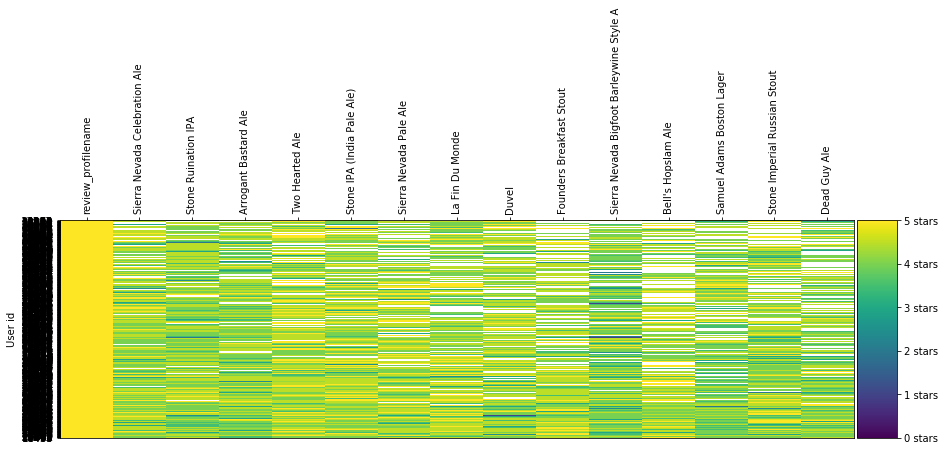

In [145]:
# Define the plotting heatmap function
def draw_beers_heatmap(most_rated_beers_users_selection, axis_labels =True):
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_beers_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    if axis_labels:
        ax.set_yticks(np.arange(most_rated_beers_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_beers_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_beers_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_beers_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')
# Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
# Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
plt.show()
# Print the heatmap
draw_beers_heatmap(most_rated_beers_users_selection)

In [153]:
# Conversion to sparse csr matrix
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_beers_users_selection).to_coo())

In [150]:
# 4 clusters
predictions = KMeans(n_clusters=4, algorithm='full').fit_predict(sparse_ratings)
# Select the mas number of users and movies heatmap cluster
max_users = 1000
max_beers = 15
# Cluster and print some of them
clustered = pd.concat([most_rated_beers_users_selection(), pd.DataFrame({'group':predictions})], axis=1)
draw_movie_clusters(clustered, max_users, max_beers)

TypeError: 'DataFrame' object is not callable

In [152]:
clustered.head(65)

,index,review_profilename,Sierra Nevada Celebration Ale,Stone Ruination IPA,Arrogant Bastard Ale,Two Hearted Ale,Stone IPA (India Pale Ale),Sierra Nevada Pale Ale,La Fin Du Monde,Duvel,Founders Breakfast Stout,group
0,12922,13076.0,4.00,4.00,4.0,5.00,4.50,5.0,4.5,4.0,4.50,1
1,20067,20317.0,4.50,4.50,5.0,4.50,5.00,4.5,5.0,5.0,5.00,1
2,7875,7973.0,4.50,4.00,3.5,4.00,4.00,5.0,4.0,4.0,3.50,0
3,17172,17382.0,4.50,5.00,4.5,4.50,4.50,4.5,4.5,4.5,4.50,1
4,16024,16217.0,5.00,4.50,4.5,4.50,3.50,5.0,3.5,4.0,4.00,1
5,28062,28433.0,3.50,4.50,4.0,4.00,4.50,4.5,4.5,4.0,5.00,2
6,7121,7213.0,4.50,4.50,4.0,4.50,4.50,5.0,4.0,4.0,4.50,0
7,13577,13738.0,5.00,4.50,4.0,4.50,5.00,5.0,4.5,5.0,4.50,1
8,18091,18315.0,3.50,4.00,4.0,5.00,4.50,5.0,4.5,4.0,4.00,1
9,8221,8324.0,4.00,4.00,4.0,4.50,4.50,4.0,3.5,3.0,4.00,0
